## ЗАВДАННЯ

### Вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока. Порівняйте результати та зробіть висновки.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional

In [2]:
# Завантаження та підготовка даних
max_features = 10000
maxlen = 500

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


# RNN

In [3]:
# Створення моделі
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Ведення опису моделі:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 79s 141ms/step - loss: 0.5648 - accuracy: 0.7024 - val_loss: 0.4608 - val_accuracy: 0.7865
Epoch 2/5
547/547 [==============================] - 75s 137ms/step - loss: 0.3616 - accuracy: 0.8483 - val_loss: 0.4157 - val_accuracy: 0.8195
Epoch 3/5
547/547 [==============================] - 71s 130ms/step - loss: 0.2521 - accuracy: 0.8997 - val_loss: 0.4310 - val_accuracy: 0.8321
Epoch 4/5
547/547 [==============================] - 75s 136ms/step - loss: 0.1617 - accuracy: 0.9406 - val_loss: 0.5144 - val_accuracy: 0.8144
Epoch 5/5
547/547 [==============================] - 69s 127ms/step - loss: 0.0624 - accuracy: 0.9821 - val_loss: 0.6141 - val_accuracy: 0.8088


In [7]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 21s 27ms/step - loss: 0.6011 - accuracy: 0.8109
Точність на тестових даних: 0.810920000076294
Втрати на тестових даних: 0.6011229157447815


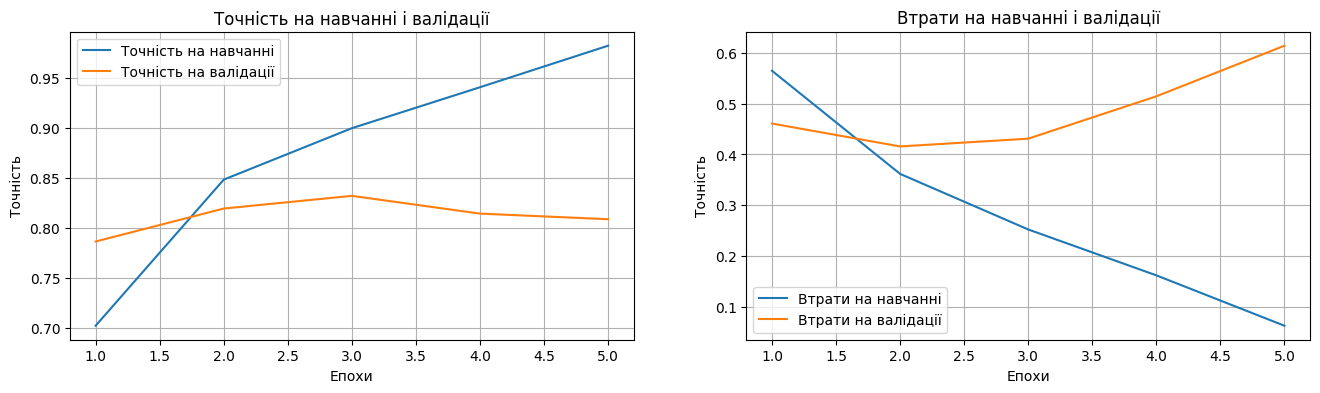

In [8]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [9]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 21s 27ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання RNN на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 98%, на валідаційних даних становить 80.88%, і втрати на валідаційних даних дорівнюють близько 0.6141. Тобто модель RNN показала досить непоганий результат на валідаційних даних.

Після оцінки моделі на тестових даних точність на тестових даних складає 81.09%, і втрати на тестових даних становлять близько 0.6011.

Це свідчить про те, що модель RNN здатна розпізнавати рецензії з досить прийнятним результатом, але її точність може бути подальшим чином покращена шляхом оптимізації гіперпараметрів, регуляризації та інших покращень.

# LSTM

In [10]:
# Створення моделі LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Ведення опису моделі:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 141s 253ms/step - loss: 0.4405 - accuracy: 0.7896 - val_loss: 0.3256 - val_accuracy: 0.8639
Epoch 2/5
547/547 [==============================] - 130s 238ms/step - loss: 0.2625 - accuracy: 0.8966 - val_loss: 0.3124 - val_accuracy: 0.8787
Epoch 3/5
547/547 [==============================] - 129s 235ms/step - loss: 0.1957 - accuracy: 0.9263 - val_loss: 0.3860 - val_accuracy: 0.8668
Epoch 4/5
547/547 [==============================] - 140s 256ms/step - loss: 0.1399 - accuracy: 0.9506 - val_loss: 0.3611 - val_accuracy: 0.8720
Epoch 5/5
547/547 [==============================] - 139s 254ms/step - loss: 0.1081 - accuracy: 0.9646 - val_loss: 0.4696 - val_accuracy: 0.8532


In [14]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 37s 47ms/step - loss: 0.5263 - accuracy: 0.8375
Точність на тестових даних: 0.8374800086021423
Втрати на тестових даних: 0.5262539982795715


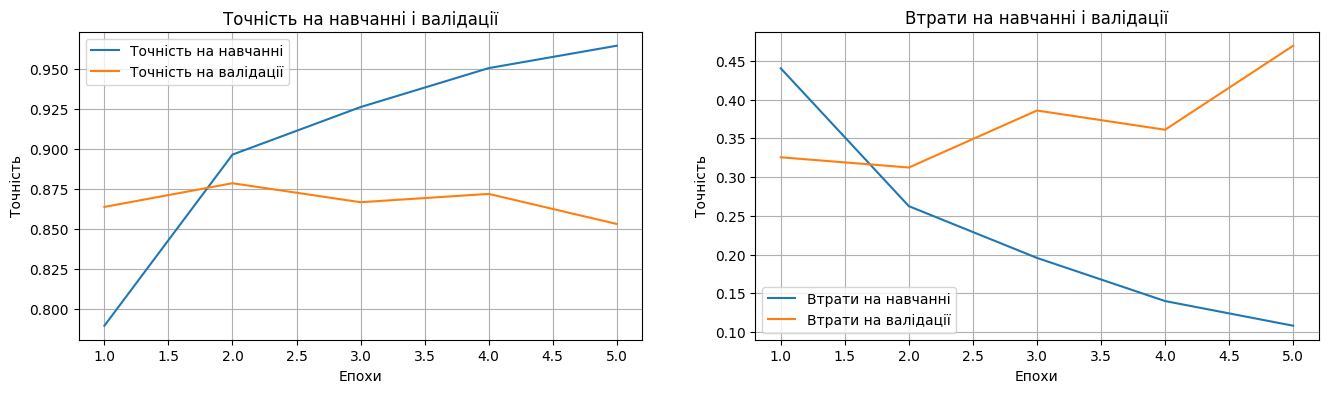

In [15]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [16]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 38s 48ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання LSTM на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 96%, на валідаційних даних становить 85.32%, і втрати на валідаційних даних дорівнюють близько 0.4696, що є досить високим показником.

Після оцінки моделі на тестових даних ми бачимо, що точність становить 83.75%. Втрати на тестових даних також відносно низькі і складають 0.5263.

Ці результати свідчать про те, що модель на основі LSTM добре справляється з класифікацією рецензій на позитивні та негативні. Вона досягла досить високої точності і може бути використана для аналізу тексту та класифікації рецензій.

# BRNN

In [17]:
# Створення двосторонньої моделі LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [18]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Ведення опису моделі:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 241s 433ms/step - loss: 0.4664 - accuracy: 0.7707 - val_loss: 0.3271 - val_accuracy: 0.8669
Epoch 2/5
547/547 [==============================] - 236s 431ms/step - loss: 0.2837 - accuracy: 0.8898 - val_loss: 0.4654 - val_accuracy: 0.7819
Epoch 3/5
547/547 [==============================] - 236s 431ms/step - loss: 0.2220 - accuracy: 0.9177 - val_loss: 0.3346 - val_accuracy: 0.8745
Epoch 4/5
547/547 [==============================] - 232s 424ms/step - loss: 0.1489 - accuracy: 0.9489 - val_loss: 0.3695 - val_accuracy: 0.8575
Epoch 5/5
547/547 [==============================] - 234s 428ms/step - loss: 0.1266 - accuracy: 0.9559 - val_loss: 0.3973 - val_accuracy: 0.8645


In [21]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 63s 81ms/step - loss: 0.4271 - accuracy: 0.8586
Точність на тестових даних: 0.8586400151252747
Втрати на тестових даних: 0.4270578622817993


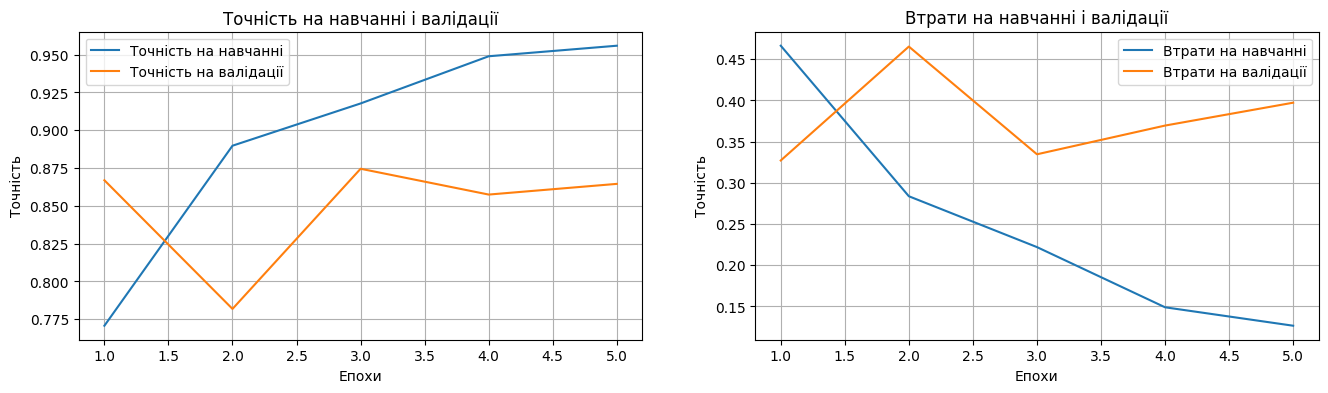

In [22]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [23]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 62s 76ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання BRNN на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 95%, на валідаційних даних складає 86.45%, і втрати на валідаційних даних дорівнюють близько 0.3973, що є досить високим показником.

Після оцінки моделі на тестових даних ми бачимо, що точність становить 85.86%. Втрати на тестових даних також відносно низькі і складають 0.4271.

Ці результати свідчать про те, що модель BRNN добре справляється з класифікацією рецензій на позитивні та негативні. Вона досягла досить високої точності та може бути використана для аналізу тексту та класифікації рецензій.

У порівнянні з іншими моделями, такими як RNN та LSTM, BRNN також демонструє добрі результати, і точність моделі на тестових даних є приблизно на одному рівні.

# DRNN

In [24]:
# Створення глибокої рекурентної мережі
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [25]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Ведення опису моделі:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Навчання моделі
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 502s 904ms/step - loss: 0.4152 - accuracy: 0.8027 - val_loss: 0.3352 - val_accuracy: 0.8587
Epoch 2/5
547/547 [==============================] - 529s 968ms/step - loss: 0.2277 - accuracy: 0.9134 - val_loss: 0.3066 - val_accuracy: 0.8720
Epoch 3/5
547/547 [==============================] - 503s 920ms/step - loss: 0.1835 - accuracy: 0.9313 - val_loss: 0.4873 - val_accuracy: 0.7852
Epoch 4/5
547/547 [==============================] - 521s 952ms/step - loss: 0.1698 - accuracy: 0.9401 - val_loss: 0.4017 - val_accuracy: 0.8583
Epoch 5/5
547/547 [==============================] - 497s 908ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.4691 - val_accuracy: 0.8657


In [28]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Точність на тестових даних: {test_acc}")
print(f"Втрати на тестових даних: {test_loss}")

782/782 [==============================] - 132s 169ms/step - loss: 0.4903 - accuracy: 0.8581
Точність на тестових даних: 0.8581200242042542
Втрати на тестових даних: 0.49032679200172424


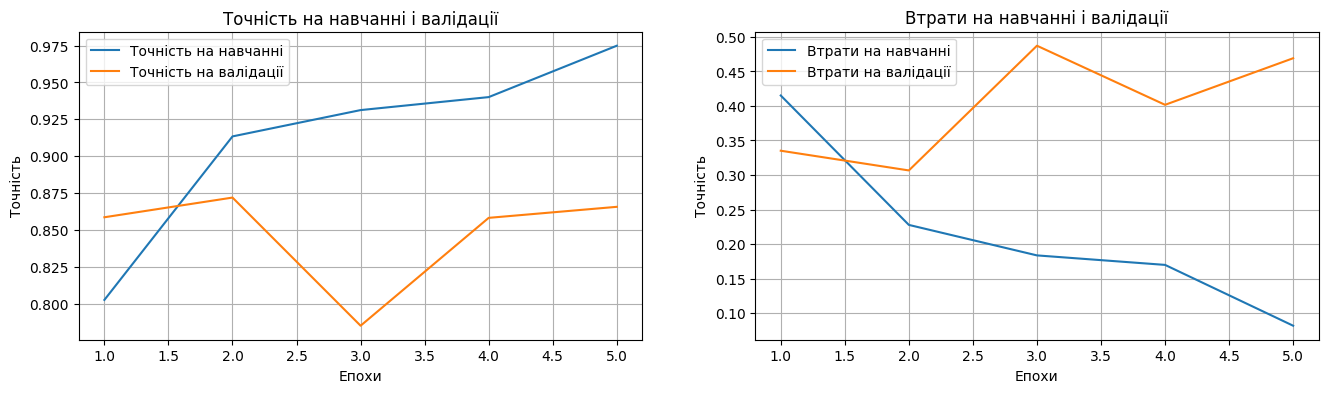

In [29]:
# Виведення результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, acc, label='Точність на навчанні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, loss, label='Втрати на навчанні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати на навчанні і валідації')
plt.legend()
plt.xlabel('Епохи')
plt.ylabel('Точність')

plt.show()

In [30]:
# Прогнозування з використанням навченої моделі:
predictions = model.predict(test_data)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

782/782 [==============================] - 153s 193ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


### За результатами навчання DRNN на даних для тренування та валідації видно наступне:

По завершенню п'ятої епохи точність на тренувальних даних більше 97%, на валідаційних даних складає 86.57%, і втрати на валідаційних даних дорівнюють близько 0.4691, що є досить високим показником.

Після оцінки моделі на тестових даних ми бачимо, що точність становить 85.81%. Втрати на тестових даних також відносно низькі і складають 0.4903.

DRNN є конкурентоспроможною моделлю, показуючи дуже добрі результати як на валідаційних, так і на тестових даних. Це одна з кращих моделей серед розглянутих варіантів.

## ЗАГАЛЬНІ ВИСНОВКИ:

на основі результатів кожної з чотирьох різновидів нейронних мереж для аналізу тексту на датасеті IMDB:

| Модель               | Точність на валідації | Точність на тестах | Втрати на валідації | Втрати на тестах |
|----------------------|------------------------|--------------------|----------------------|------------------|
| RNN                  | 80.88%                 | 81.09%             | 0.6141               | 0.6011           |
| LSTM                 | 85.32%                 | 83.75%             | 0.4696               | 0.5263           |
| BRNN                 | 86.45%                 | 85.86%             | 0.3973               | 0.4271           |
| DRNN                 | 86.57%                 | 85.81%             | 0.4691               | 0.4903           |


**BRNN** та **DRNN** продемонстрували найкращу продуктивність серед усіх моделей. Обидві моделі досягли високої точності на валідаційних даних (86.45% для BRNN та 86.57% для DRNN), і мають подібну точність на тестових даних (85.86% для BRNN та 85.81% для DRNN). Втрати на валідаційних даних для BRNN складають 0.3973, а для DRNN - 0.4691. Ці моделі є конкурентоспроможними і показали дуже добрі результати на завданні класифікації рецензій.

**LSTM** також виявилася дуже ефективною, з досягнутою точністю на валідаційних даних в 85.32% і на тестових даних - 83.75%. Втрати на валідаційних даних становлять 0.4696. Модель на основі LSTM добре справляється з завданням класифікації рецензій.

**RNN** показала найнижчу точність серед усіх моделей на валідаційних даних (80.88%) та на тестових даних (81.09%). Втрати на валідаційних даних становлять 0.6141. Ця модель може бути покращена для досягнення кращих результатів.